In [1]:
from __future__ import annotations
from warnings import filterwarnings
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

pd.options.display.max_columns= 200
sns.set_style('darkgrid')
filterwarnings('ignore')

In [2]:
DATAFILE = Path('..') / 'Data' / 'survey_results_public.csv'

In [3]:
data = pd.read_csv(DATAFILE)
data.drop(columns='Unnamed: 0', axis=1, inplace=True)
data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,27590,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,Udemy;Other,Less than 1 year,Less than 1 year,"Developer, back-end",20 to 99 employees,I have little or no influence,Ask developers I know/work with,Slovakia,EUR European Euro,1200.0,Monthly,Bash/Shell;Java;PowerShell;Python;SQL,Bash/Shell;Java;JavaScript;PowerShell;Python;SQL,MariaDB;MySQL;PostgreSQL,MariaDB;MongoDB;PostgreSQL,NaN,NaN,Django,Angular;Django,Spring,Spring,NaN,NaN,IntelliJ,Android Studio;IntelliJ;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line,NaN,NaN,Jira Work Management,Jira Work Management,Microsoft Teams,Microsoft Teams,Indifferent,Stack Overflow,Daily or almost daily,Yes,I have never participated in Q&A on Stack Over...,Neutral,25-34 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,Yes,Independent contributor,3.0,Strongly agree,Agree,Neither agree nor disagree,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Continuous integ...,No,No,Yes,Appropriate in length,Neither easy nor difficult,15360.0
1,19538,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Stack Overflow;O...,Coursera;Udemy,12,10,Engineering manager,100 to 499 employees,I have some influence,Start a free trial;Visit developer communities...,India,INR\tIndian rupee,NaN,NaN,C;C#;C++;JavaScript;Objective-C;Python;Swift,JavaScript;Python,DynamoDB;Elasticsearch;Microsoft SQL Server;Mo...,DynamoDB;Elasticsearch;MongoDB,AWS;Microsoft Azure,AWS;Google Cloud,Django;Node.js;React.js,Next.js;Node.js;React.js,React Native,Apache Kafka,Docker;Homebrew;Kubernetes;Terraform,Docker;Homebrew;Kubernetes;Terraform,Android Studio;PyCharm;Visual Studio Code;Xcode,PyCharm;Visual Studio Code,macOS,Windows,Git,Command-line;Dedicated version control GUI app...,NaN,NaN,Confluence;Jira Work Management,Confluence;Jira Work Management;Notion,Microsoft Teams;Slack;Zoom,Microsoft Teams;Slack;Zoom,Favorable,Stack Overflow,A few times per week,Yes,Less than once per month or monthly,"Yes, definitely",25-34 years old,Man,NaN,NaN,Indian,NaN,NaN,Yes,People manager,13.0,Agree,Agree,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,1-2 times a week,1-2 times a week,1-2 times a we

In [4]:
data.shape

(65941, 79)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65941 entries, 0 to 65940
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      65941 non-null  int64  
 1   MainBranch                      65941 non-null  object 
 2   Employment                      64549 non-null  object 
 3   RemoteWork                      53126 non-null  object 
 4   CodingActivities                53072 non-null  object 
 5   EdLevel                         64427 non-null  object 
 6   LearnCode                       64435 non-null  object 
 7   LearnCodeOnline                 45592 non-null  object 
 8   LearnCodeCoursesCert            26479 non-null  object 
 9   YearsCode                       64213 non-null  object 
 10  YearsCodePro                    46669 non-null  object 
 11  DevType                         55201 non-null  object 
 12  OrgSize                         

## Sample of the dataset:

In [6]:
subset = data.sample(frac=.30)
subset.shape

(19782, 79)

In [7]:
# subset.to_csv(PATH / 'survey_subset_stackoverflow.csv', index=False)

# Unique Columns:

In [8]:
# -- getting started with some limited number of columns --
df = subset[['Employment', 'DevType', 'RemoteWork', 'EdLevel', 'Age', 'Gender',
             'LanguageHaveWorkedWith', 'YearsCode', 'Country', 
             'CompFreq', 'ConvertedCompYearly',
            ]].copy()
df.head(3)

,Employment,DevType,RemoteWork,EdLevel,Age,Gender,LanguageHaveWorkedWith,YearsCode,Country,CompFreq,ConvertedCompYearly
1901,"Independent contractor, freelancer, or self-em...","Developer, full-stack;Database administrator;D...",Fully remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25-34 years old,NaN,Bash/Shell;C#;Groovy;HTML/CSS;Java;JavaScript;...,20,Portugal,Yearly,122640.0
59336,"Employed, full-time","Developer, mobile;Developer, game or graphics",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25-34 years old,Man,C#;Dart,11,Russian Federation,Monthly,NaN
24724,"Employed, full-time","Developer, back-end;Cloud infrastructure engineer","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18-24 years old,Man,C++;Java,5,Canada,Yearly,81988.0


In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19782 entries, 1901 to 28922
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employment              19350 non-null  object 
 1   DevType                 16525 non-null  object 
 2   RemoteWork              15886 non-null  object 
 3   EdLevel                 19322 non-null  object 
 4   Age                     19166 non-null  object 
 5   Gender                  19148 non-null  object 
 6   LanguageHaveWorkedWith  19159 non-null  object 
 7   YearsCode               19267 non-null  object 
 8   Country                 19373 non-null  object 
 9   CompFreq                12013 non-null  object 
 10  ConvertedCompYearly     10309 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.8+ MB


In [10]:
df.isna().sum().sort_values(ascending=False)

ConvertedCompYearly       9473
CompFreq                  7769
RemoteWork                3896
DevType                   3257
Gender                     634
LanguageHaveWorkedWith     623
Age                        616
YearsCode                  515
EdLevel                    460
Employment                 432
Country                    409
dtype: int64

## Data Cleaning & Preparation:

In [11]:
df.RemoteWork = df.RemoteWork.map({
    'Fully remote' : 'remote', 
    'Hybrid (some remote, some in-person)' : 'hybrid', 
    'Full in-person': 'onsite'
})
most_frequent_worktype = df.RemoteWork.mode()[0]
df.RemoteWork = df.RemoteWork.replace(np.NaN, most_frequent_worktype, regex=True)
df.RemoteWork = df.RemoteWork.astype("category")

In [12]:
df['DevType'] = df['DevType'].replace(np.NaN, 'Developer', regex=True)
df['DevType'] = df['DevType'].astype('string')

In [13]:
df['Gender'] = df['Gender'].map({
    'Man' : 'male', 
    'Woman' : 'female', 
    'Prefer not to say' : 'not mentioned', 
    'Non-binary, genderqueer, or gender non-conforming' : 'non-confirming',
    'Or, in your own words:' : 'non-confirming',
    'Man;Non-binary, genderqueer, or gender non-conforming' : 'non-confirming',
    'Woman;Non-binary, genderqueer, or gender non-conforming' : 'non-confirming',
    'Man;Or, in your own words:' : 'non-confirming',
    'Man;Woman' : 'non-confirming',
    'Man;Woman;Non-binary, genderqueer, or gender non-conforming' : 'non-confirming',
    'Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming' : 'non-confirming',
    'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming' : 'non-confirming',
    'Or, in your own words:;Non-binary, genderqueer, or gender non-conforming' : 'non-confirming',
    'Or, in your own words:;Woman' : 'non-confirming',
    'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming' : 'non-confirming',
    'Man;Or, in your own words:;Woman' : 'non-confirming',
})

df['Gender'] = df['Gender'].replace(np.NaN, df['Gender'].mode()[0], regex=True)
df['Gender'] = df['Gender'].astype('category')

In [14]:
df['Age'] = df['Age'].replace(np.NaN, df['Age'].mode()[0], regex=True)
df['Age'] = df['Age'].astype('category')

In [15]:
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].replace(
    np.NaN, df['LanguageHaveWorkedWith'].mode()[0], regex=True)

df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].astype('string')

In [16]:
df['YearsCode'] = df['YearsCode'].str.replace('Less than 1 year', '1', regex=True)
df['YearsCode'] = df['YearsCode'].str.replace('More than 50 years', '50', regex=True)
df['YearsCode'] = df['YearsCode'].replace(np.NaN, '0', regex=True)
df['YearsCode'] = df['YearsCode'].astype('int')

In [17]:
df['EdLevel'] = df['EdLevel'].map({
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' : 'bachelors',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 'masters',
    'Some college/university study without earning a degree' : 'no degree',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'school',
    'Other doctoral degree (Ph.D., Ed.D., etc.)' : 'doctorate',
    'Associate degree (A.A., A.S., etc.)' : 'associate degree',
    'Primary/elementary school' : 'school',
    'Something else' : 'not mentioned',
    'Professional degree (JD, MD, etc.)' : 'professional degree (JD, MD, etc.)'
}) 
df['EdLevel'] = df['EdLevel'].replace(np.NaN, df['EdLevel'].mode()[0], regex=True)
df['EdLevel'] = df['EdLevel'].astype('category')

In [18]:
df['Employment'] = df['Employment'].replace(np.NaN, df['Employment'].mode()[0], regex=True)
df['Employment'] = df['Employment'].astype('category')

In [19]:
df['CompFreq'] = df['CompFreq'].replace(np.NaN, 'Yearly', regex=True)
df['CompFreq'] = df['CompFreq'].astype('category')

In [20]:
df['Country'] = df['Country'].replace(np.NaN, df['Country'].mode()[0], regex=True)
df['Country'] = df['Country'].astype('string')

In [21]:
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].replace(np.NaN, df.ConvertedCompYearly.mean())

## EDA: Visualizations 📊

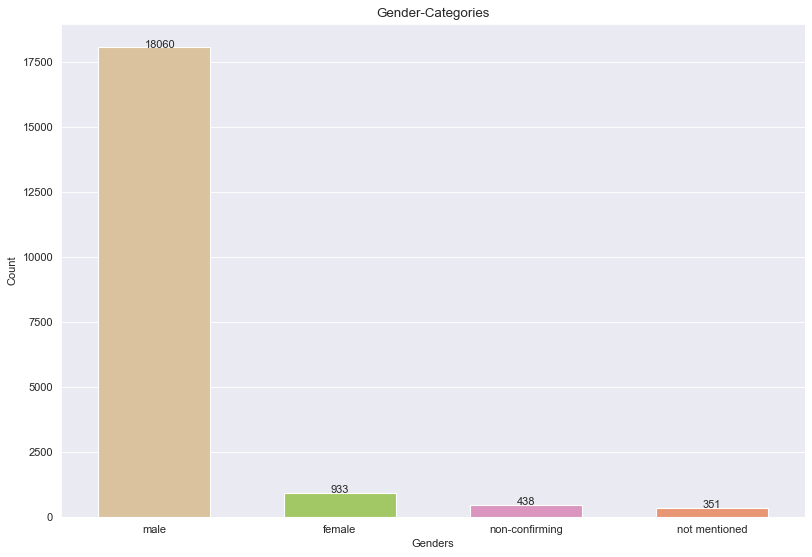

In [22]:
plt.figure(figsize=(12, 8), dpi=80)

ax = sns.countplot(
    data=df, 
    x='Gender', 
    order=df['Gender'].value_counts().index, 
    palette="Set2_r", 
    width=.6)

for p, label in zip(ax.patches, df.Gender.value_counts()):
    ax.annotate(label, (p.get_x() + .25, p.get_height() + .5))

ax.set_xlabel('Genders')
ax.set_ylabel('Count')
ax.set_title('Gender-Categories')

plt.show()

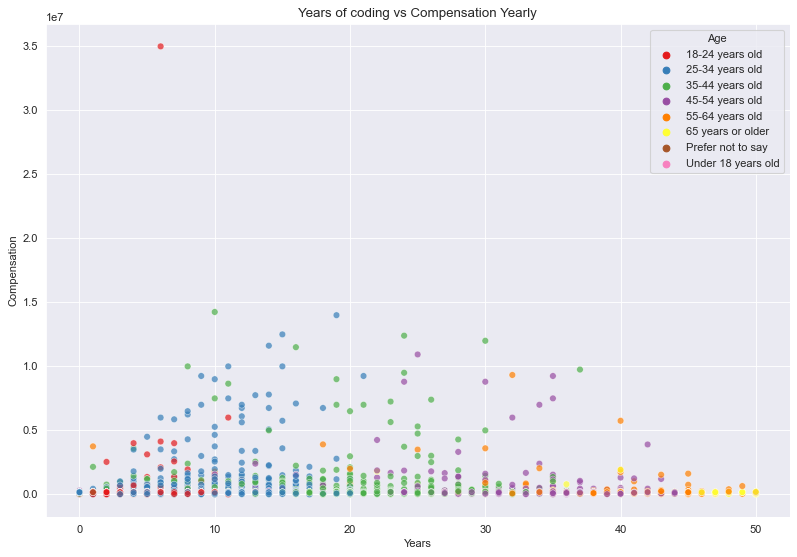

In [23]:
plt.figure(figsize=(12, 8), dpi=80)
ax = sns.scatterplot(
        data=df, 
        x='YearsCode', 
        y='ConvertedCompYearly', 
        alpha=.7,
        hue='Age',
        legend='auto', 
        palette="Set1"
);

ax.set_title("Years of coding vs Compensation Yearly")
ax.set_xlabel("Years")
ax.set_ylabel("Compensation")
plt.show()

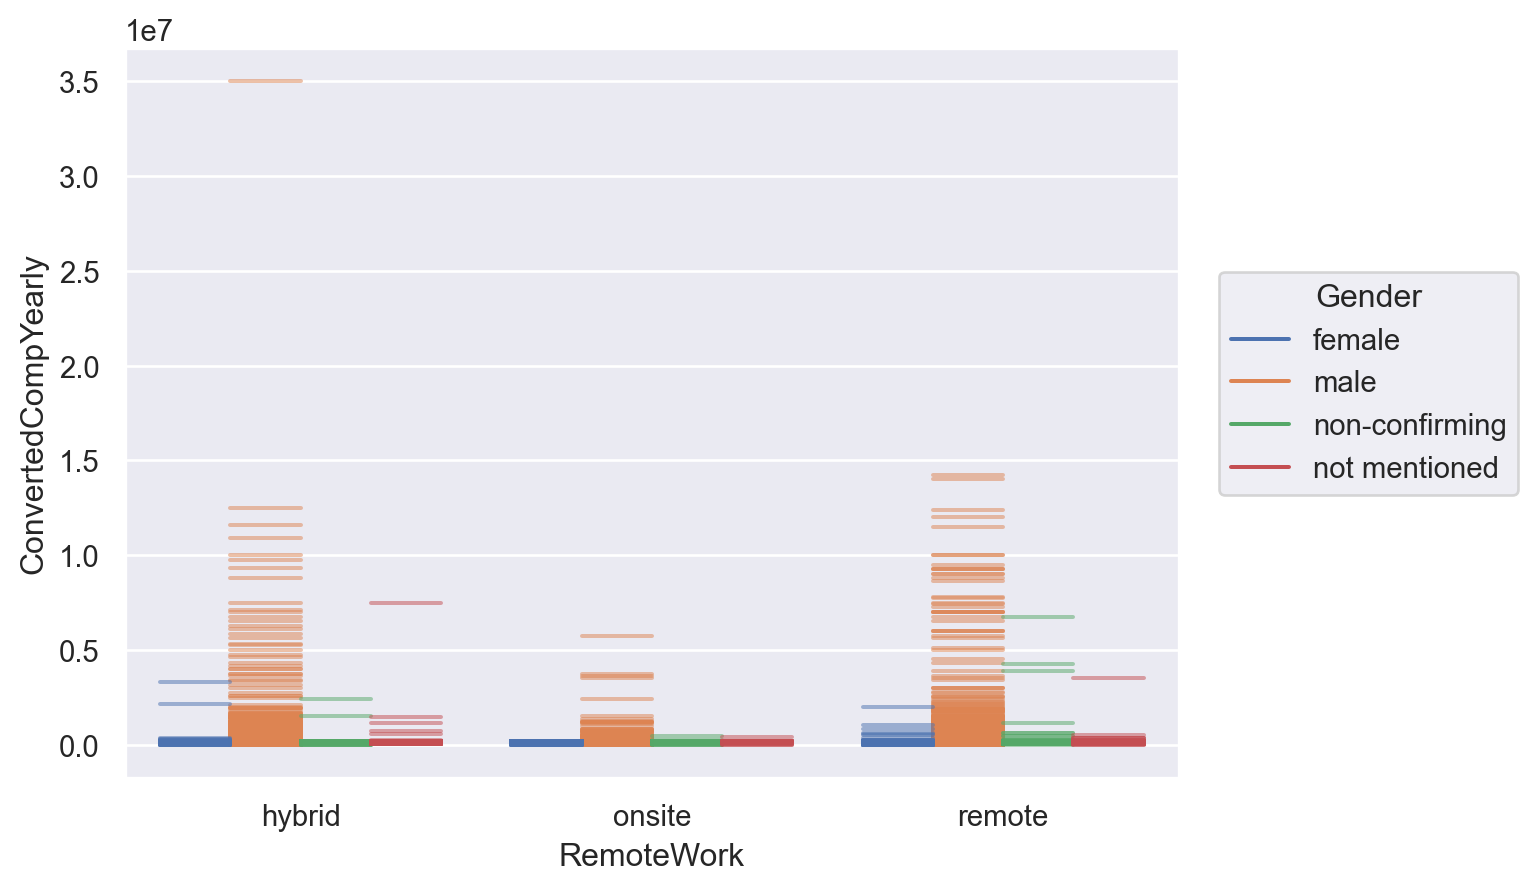

In [24]:
p = so.Plot(data=df, x='RemoteWork', y='ConvertedCompYearly', color='Gender')
p.add(so.Dash(alpha=.5), so.Dodge())

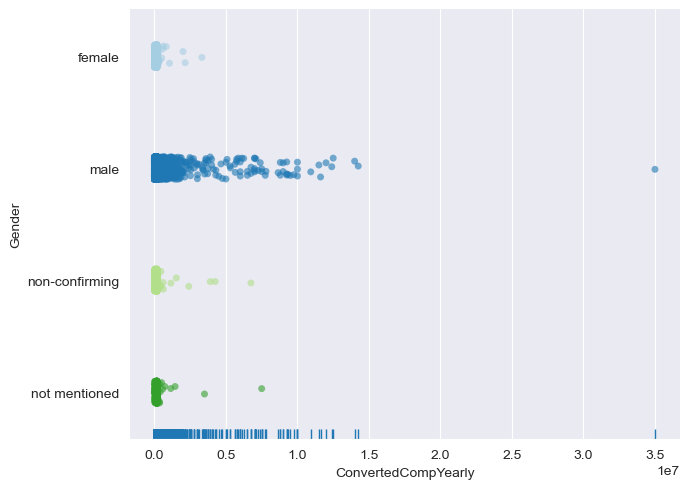

In [25]:
sns.catplot(df, x='ConvertedCompYearly', y='Gender', palette='Paired', aspect=1.4, alpha=.6);
sns.rugplot(df, x='ConvertedCompYearly');

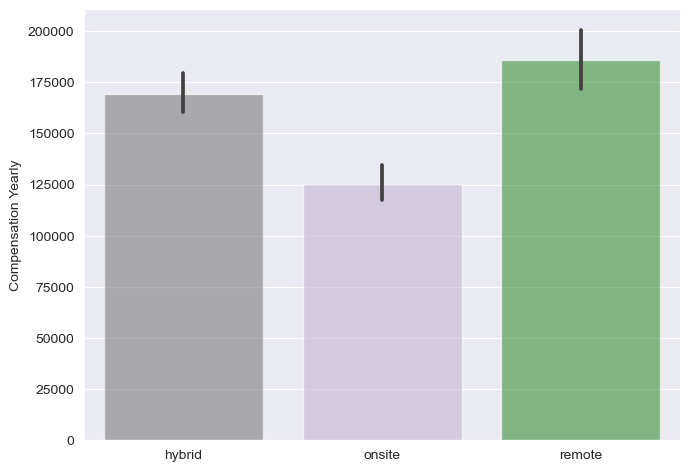

In [26]:
ax = sns.catplot( 
    df, 
    x='RemoteWork', 
    y='ConvertedCompYearly', 
    kind='bar',
    height=5,
    aspect=1.4,
    palette="tab20_r", 
    alpha=.6
)
ax.set_axis_labels("", "Compensation Yearly");

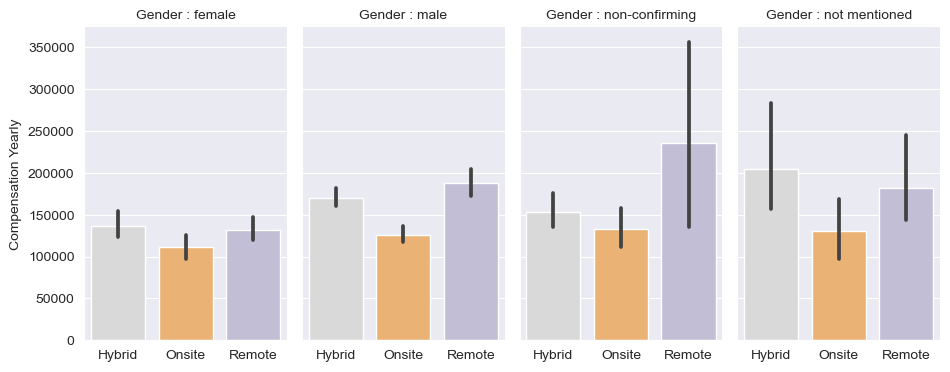

In [27]:
ax = sns.catplot( 
    df, 
    x='RemoteWork', 
    y='ConvertedCompYearly', 
    col='Gender', 
    kind='bar', 
    height=4, 
    aspect=.6,
    palette="Set3_r"
)
ax.set_axis_labels("", "Compensation Yearly")
ax.set_xticklabels(['Hybrid', 'Onsite', 'Remote'])
ax.set_titles("{col_var} : {col_name}");

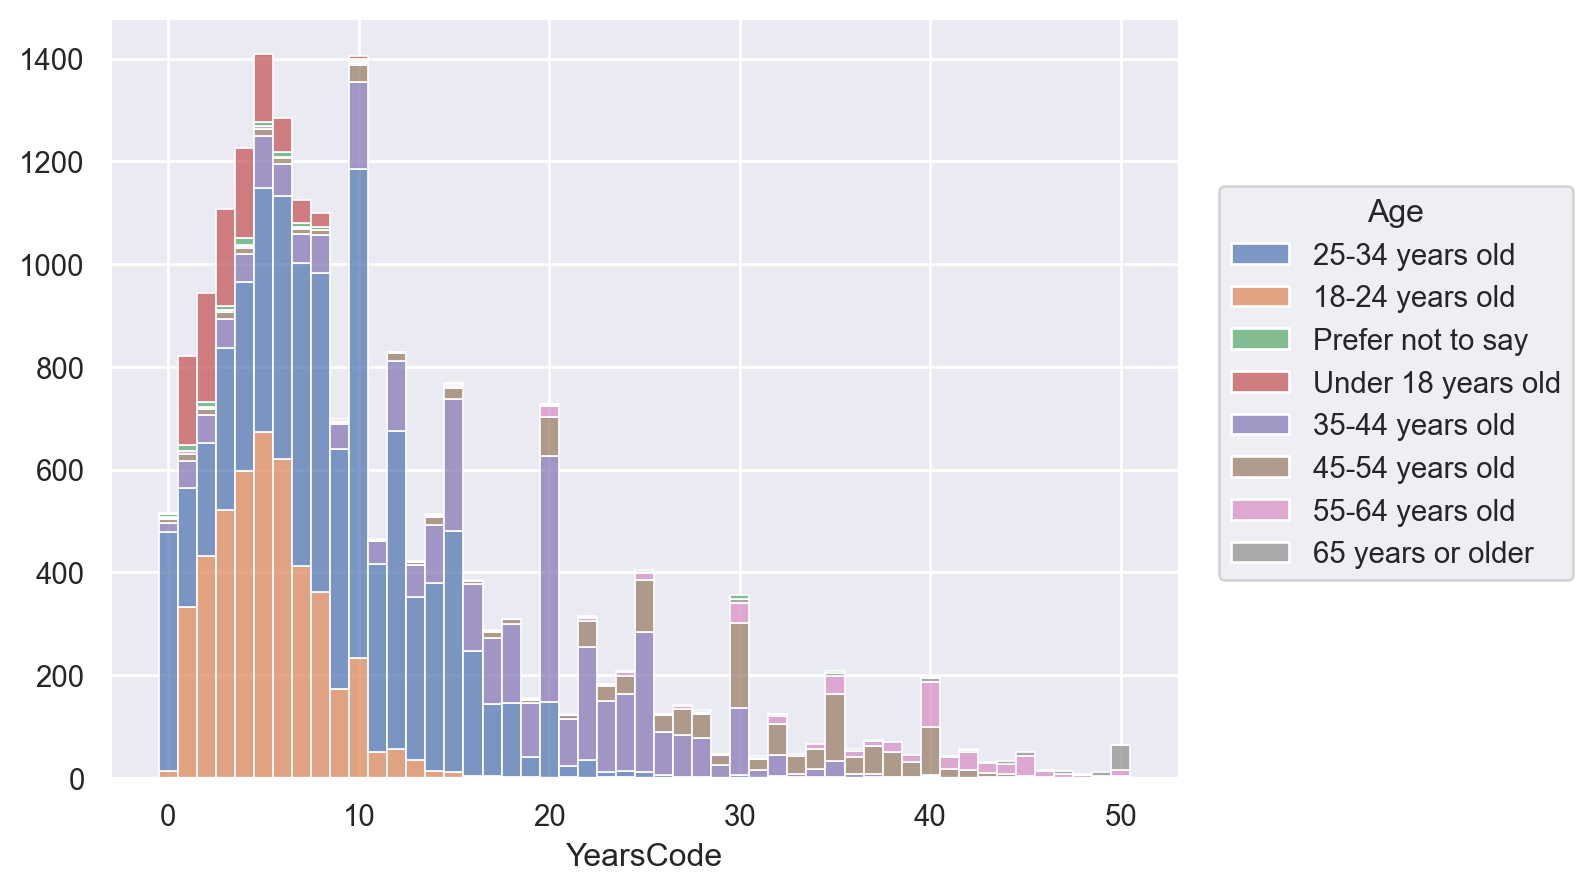

In [28]:
p = so.Plot(df, 'YearsCode', color='Age')
p.add(so.Bars(), so.Count(), so.Stack())

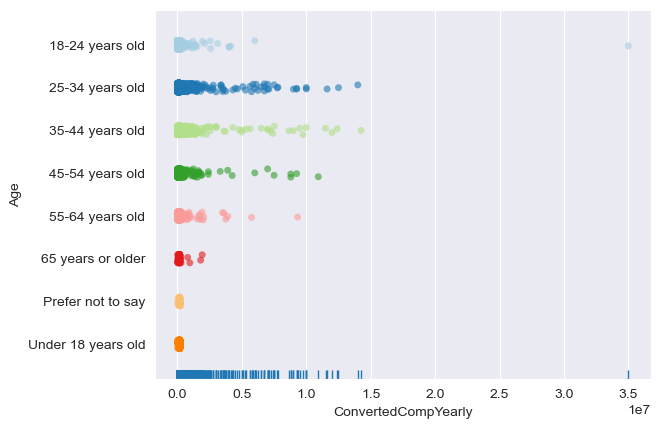

In [29]:
sns.stripplot(df, y='Age', x='ConvertedCompYearly', palette='Paired', alpha=.6)
sns.rugplot(df, x='ConvertedCompYearly');